In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import PIL
print(tf.__version__)
#import tensorflow_addons as tfa
#print(tfa.__version__)
import pickle
import random
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as cr
import seaborn as sns

2.0.0


In [2]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive')
!ls "gdrive/My Drive/"


Mounted at /content/gdrive
'Colab Notebooks'   ImageCLEF2013PlantTask   models   tf_issue	 tutorial


In [5]:
HOME_DIR = '/Users/lucianoaraujo/Desktop/'
DRIVE_DIR = 'gdrive/My Drive/'
DATA_DIR = 'ImageCLEF2013PlantTask'

LIST_OF_TRAINING_IMAGES = '/list_of_train_images.csv'
PATH_LIST = DATA_DIR +'/resources/' + 'training_path_list.csv'

In [14]:
# Load Prediction files
original_dataset_predictions = pd.read_csv(HOME_DIR+'/git/res50_original_predictions.csv')
crop_dataset_predictions = pd.read_csv(HOME_DIR+'/git/res50_crop_predictions.csv')
crop_and_translate_deep_predictions = pd.read_csv(HOME_DIR+'/git/res50_trans_and_crop_pred.csv',delimiter=';')
y_true = original_dataset_predictions.y_true

In [15]:
def filter_measure(measure, classification_report_dict):
    if measure == 'f1-score':
        f1_by_class = []
        for i in range(250):
            i = str(i)
            f1_by_class.append(classification_report_dict[i][measure])
        return f1_by_class    

In [16]:
f1_original_dataset = filter_measure('f1-score', cr(y_true, original_dataset_predictions.y_pred, labels=list(range(250)),output_dict=True))
f1_crop_dataset = filter_measure('f1-score', cr(y_true, crop_dataset_predictions.y_pred, labels=list(range(250)),output_dict=True))
f1_trans_and_crop_dataset = filter_measure('f1-score', cr(crop_and_translate_deep_predictions.y_true, crop_and_translate_deep_predictions.y_pred, labels=list(range(250)),output_dict=True))

In [19]:
original_cr = cr(y_true, original_dataset_predictions.y_pred, labels=label_list,output_dict=False)
crop_cr = cr(y_true, crop_dataset_predictions.y_pred, labels=label_list,output_dict=False)


In [23]:
crop_and_translate_cr = cr(crop_and_translate_deep_predictions.y_true, crop_and_translate_deep_predictions.y_pred, labels=label_list,output_dict=False)

In [21]:
print(original_cr)

              precision    recall  f1-score   support

           0       0.26      0.43      0.32        23
           1       0.35      0.65      0.45        34
           2       0.31      0.71      0.43       104
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        20
           5       0.38      0.68      0.49        60
           6       0.25      0.42      0.32        50
           7       0.32      0.41      0.36        41
           8       0.61      0.59      0.60        29
           9       0.49      0.23      0.31       144
          10       0.20      0.39      0.26        18
          11       0.35      0.67      0.46       125
          12       0.45      0.38      0.42        52
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         5
          15       0.58      0.50      0.54        72
          16       0.28      0.37      0.32        35
          17       0.59    

In [24]:
print(crop_and_translate_cr)

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.76      0.56      0.64        34
           2       0.41      0.75      0.53       104
           3       0.11      0.28      0.16        32
           4       0.17      0.45      0.24        20
           5       0.44      0.80      0.56        60
           6       0.30      0.70      0.42        50
           7       0.36      0.68      0.47        41
           8       0.83      0.69      0.75        29
           9       0.75      0.28      0.41       144
          10       0.46      0.67      0.55        18
          11       0.51      0.76      0.61       125
          12       0.48      0.54      0.51        52
          13       0.14      0.17      0.15         6
          14       0.17      0.20      0.18         5
          15       0.77      0.57      0.66        72
          16       0.43      0.80      0.56        35
          17       0.79    

In [493]:
# Print the classification Report for 
# the Model Trained Over the Crop and Translate Datasets + Baseline,
# sorted by support(n. testing images), filtering outliters and images with support 0
# (0 testing images)

filtered_exhibit = []
for i in label_list:
    if crop_and_translate_cr[str(i)]['support'] <= 40:
        filtered_exhibit.append((i,crop_and_translate_cr[str(i)]))
        
def takeSupport(elem):
    return elem[1]['support']

filtered_exhibit.sort(key=takeSupport, reverse=False)

for key in filtered_exhibit:
    print(key)

(37, {'recall': 0.0, 'f1-score': 0.0, 'support': 1, 'precision': 0.0})
(55, {'recall': 0.0, 'f1-score': 0.0, 'support': 1, 'precision': 0.0})
(235, {'recall': 0.0, 'f1-score': 0.0, 'support': 1, 'precision': 0.0})
(195, {'recall': 0.0, 'f1-score': 0.0, 'support': 2, 'precision': 0.0})
(237, {'recall': 0.5, 'f1-score': 0.28571428571428575, 'support': 2, 'precision': 0.2})
(181, {'recall': 0.0, 'f1-score': 0.0, 'support': 3, 'precision': 0.0})
(212, {'recall': 0.0, 'f1-score': 0.0, 'support': 3, 'precision': 0.0})
(220, {'recall': 0.0, 'f1-score': 0.0, 'support': 3, 'precision': 0.0})
(54, {'recall': 0.0, 'f1-score': 0.0, 'support': 4, 'precision': 0.0})
(234, {'recall': 0.75, 'f1-score': 0.6, 'support': 4, 'precision': 0.5})
(240, {'recall': 0.25, 'f1-score': 0.4, 'support': 4, 'precision': 1.0})
(14, {'recall': 0.2, 'f1-score': 0.28571428571428575, 'support': 5, 'precision': 0.5})
(47, {'recall': 0.2, 'f1-score': 0.28571428571428575, 'support': 5, 'precision': 0.5})
(62, {'recall': 0.2

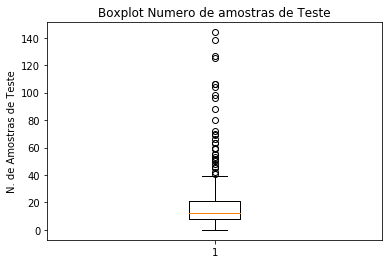

In [455]:
# Plot the testing data distribution with outliers
source = HOME_DIR+'git/test_dataset_class_distribution.csv'
test_data_dist = pd.read_csv(source).NumberOfImages
fig, ax = plt.subplots()
ax.boxplot(test_data_dist)
plt.yticks(np.arange(0, max(test_data_dist), 20))
plt.ylabel('N. de Amostras de Teste')
plt.title('Boxplot Numero de amostras de Teste')
#plt.savefig('/Users/lucianoaraujo/Desktop/boxplot_distribuicao.jpg')
plt.show()

In [18]:
null_labels = [24,80,243,244,245,246,247,248,249]
label_list = range(250)
for i in range(len(null_labels)):
    label_list.pop(null_labels[i]-i)

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(gain,showfliers=False)
plt.ylabel('Ganho (F1) - em %')
plt.title('Boxplot Ganho (F1) - Crop vs Original Dataset')
plt.show()

In [ ]:
gain = []
for i in range(250):
    sub = f1_crop_dataset[i]-f1_original_dataset[i]
    if f1_original_dataset[i] == 0:
         gain.append(f1_crop_dataset[i])
    else :
        div = sub / f1_original_dataset[i]
        g = div * 100
        gain.append(g)

fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(gain)
plt.ylabel('Ganho (F1) - em %')
plt.title('Boxplot Ganho (F1) - Crop vs Original Dataset')

plt.show()

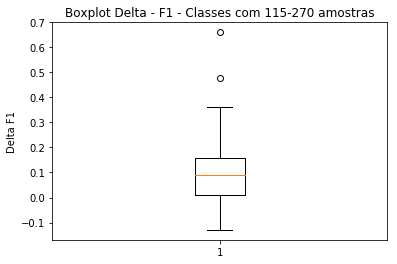

In [509]:
fig, ax = plt.subplots()
ax.boxplot(delta_f1_high_labels)
plt.ylabel('Delta F1')
plt.title('Boxplot Delta - F1 - Classes com 115-270 amostras')
plt.savefig('/Users/lucianoaraujo/Desktop/boxplot_delta_f1_115_270.jpg')
plt.show()

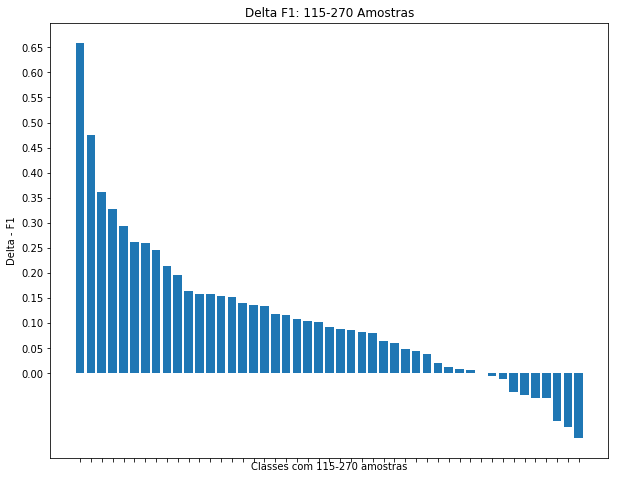

In [508]:
delta_f1_high_labels = []
for i in range(len(high_labels)):
    delta_f1_high_labels.append(delta_f1[high_labels[i]])


sorted_delta_f1_high = []
for i in range(len(delta_f1_high_labels)):
    sorted_delta_f1_high.append((i,delta_f1_high_labels[i]))

sorted_delta_f1_high.sort(key=takeSecond, reverse=True)

y_vals = []
for i in range(len(sorted_delta_f1_high)):
    y_vals.append(sorted_delta_f1_high[i][1])
    
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(range(len(high_labels)),y_vals)

plt.xticks(range(len(high_labels)), str(high_labels),visible=False)

plt.yticks(np.arange(0, max(delta_f1_high_labels), 0.05))

plt.ylabel('Delta - F1')
plt.xlabel('Classes com 115-270 amostras')
plt.title('Delta F1: 115-270 Amostras')
plt.savefig('/Users/lucianoaraujo/Desktop/delta_f1_115_270.jpg')
plt.show()

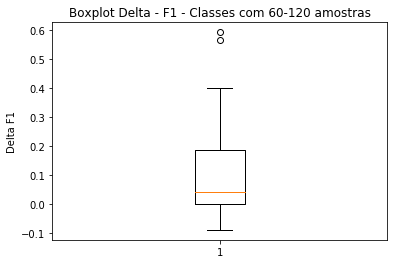

In [283]:
fig, ax = plt.subplots()
ax.boxplot(delta_f1_mid_labels)
plt.ylabel('Delta F1')
plt.title('Boxplot Delta - F1 - Classes com 60-120 amostras')
plt.savefig('/Users/lucianoaraujo/Desktop/boxplot_delta_f1_60_120.jpg')
plt.show()

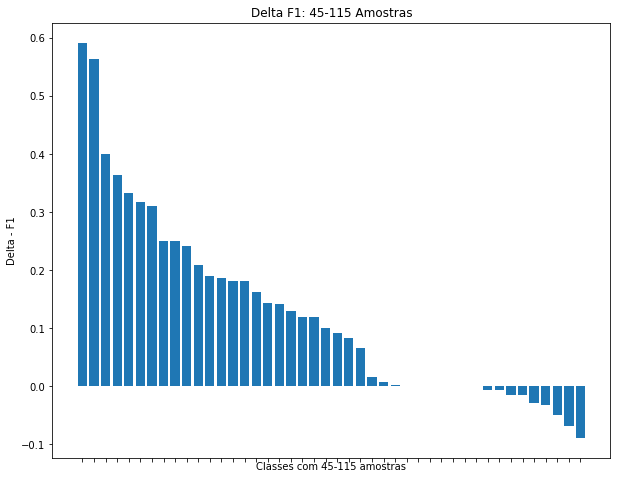

In [502]:
delta_f1_mid_labels = []
for i in range(len(mid_labels)):
    delta_f1_mid_labels.append(delta_f1[mid_labels[i]])
    
sorted_delta_f1_mid = []
for i in range(len(delta_f1_mid_labels)):
    sorted_delta_f1_mid.append((i,delta_f1_mid_labels[i]))

sorted_delta_f1_mid.sort(key=takeSecond, reverse=True)

y_vals = []
for i in range(len(sorted_delta_f1_mid)):
    y_vals.append(sorted_delta_f1_mid[i][1])
    
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(range(len(mid_labels)),y_vals)

plt.xticks(range(len(mid_labels)), str(mid_labels),visible=False)

#plt.yticks(np.arange(0, max(sorted_y_data), 20))

plt.ylabel('Delta - F1')
plt.xlabel('Classes com 45-115 amostras')
plt.title('Delta F1: 45-115 Amostras')
plt.savefig('/Users/lucianoaraujo/Desktop/delta_f1_45_115.jpg')
plt.show()

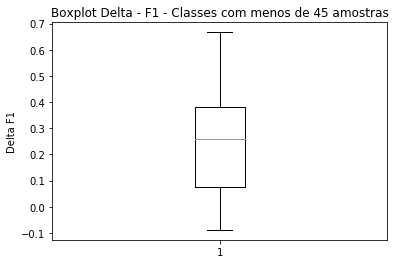

In [503]:
fig, ax = plt.subplots()
ax.boxplot(delta_f1_low_labels)
plt.ylabel('Delta F1')
plt.title('Boxplot Delta - F1 - Classes com menos de 45 amostras')
plt.savefig('/Users/lucianoaraujo/Desktop/boxplot_delta_0_45.jpg')
plt.show()

In [257]:
sorted_delta_f1_low[:][1]

(30, 0.6666666666666666)

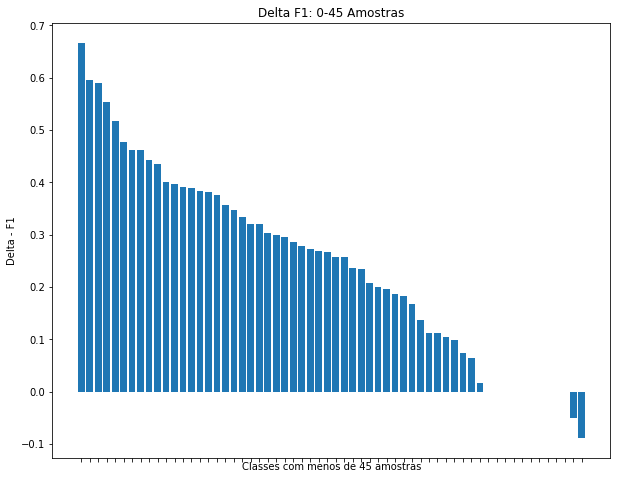

In [504]:
delta_f1_low_labels = []
for i in range(len(low_labels)):
    delta_f1_low_labels.append(delta_f1[low_labels[i]])

sorted_delta_f1_low = []
for i in range(len(delta_f1_low_labels)):
    sorted_delta_f1_low.append((i,delta_f1_low_labels[i]))

sorted_delta_f1_low.sort(key=takeSecond, reverse=True)

fig, ax = plt.subplots(figsize=(10,8))

y_vals = []
for i in range(len(sorted_delta_f1_low)):
    y_vals.append(sorted_delta_f1_low[i][1])

ax.bar(range(len(low_labels)),y_vals)

plt.xticks(range(len(low_labels)), str(low_labels),visible=False)

#plt.yticks(np.arange(0, max(sorted_y_data), 20))

plt.ylabel('Delta - F1')
plt.xlabel('Classes com menos de 45 amostras')
plt.title('Delta F1: 0-45 Amostras')
plt.savefig('/Users/lucianoaraujo/Desktop/delta_f1_0_45.jpg')
plt.show()

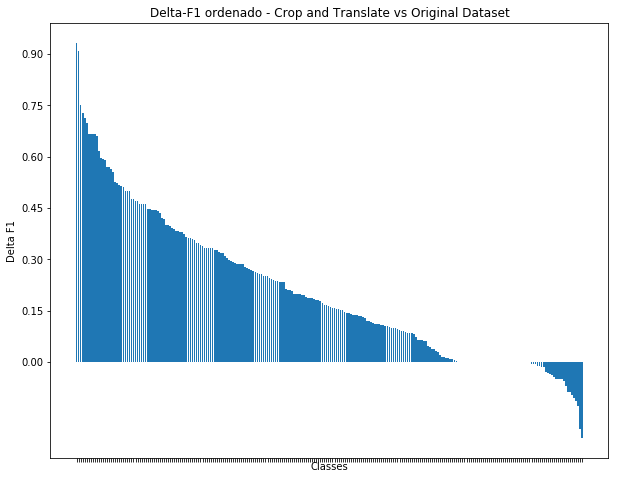

In [506]:
delta_f1 = []
for i in range(250):
    delta_f1.append(f1_crop_dataset[i] - f1_original_dataset[i])

sorted_delta_f1 = []

for i in range(250):
    sorted_delta_f1.append((i,delta_f1[i]))

sorted_y_data = []
sorted_x_data = []
sorted_delta_f1.sort(key=takeSecond, reverse=True)
for i in range(250):
    sorted_y_data.append(sorted_delta_f1[i][1])
    sorted_x_data.append(sorted_delta_f1[i][0])
    
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(range(250),sorted_y_data)

plt.xticks(range(250), str(sorted_x_data),visible=False)

plt.yticks(np.arange(0, max(sorted_y_data), 0.15))

plt.ylabel('Delta F1')
plt.xlabel('Classes')
plt.title('Delta-F1 ordenado - Crop and Translate vs Original Dataset')
plt.savefig('/Users/lucianoaraujo/Desktop/delta_f1_ordenado.jpg')
plt.show()

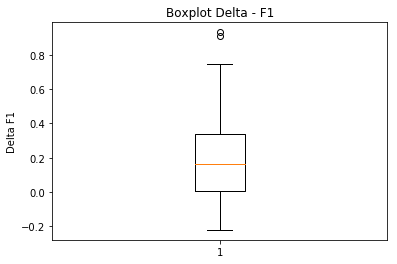

In [507]:
fig, ax = plt.subplots()
ax.boxplot(delta_f1)
plt.ylabel('Delta F1')
plt.title('Boxplot Delta - F1')
plt.savefig('/Users/lucianoaraujo/Desktop/boxplot_delta_f1.jpg')
plt.show()

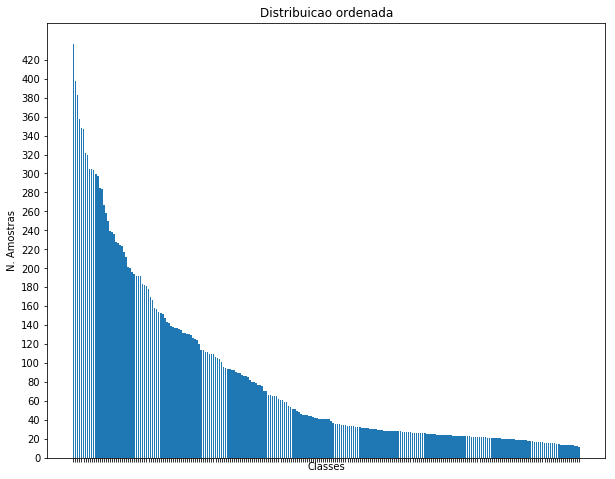

In [277]:
data_dist_cp = []

for i in range(250):
    data_dist_cp.append((i,data_dist[i]))

def takeSecond(elem):
    return elem[1]

data_dist_cp.sort(key=takeSecond, reverse=True)
sorted_y_data = []
sorted_x_data = []
for i in range(250):
    sorted_y_data.append(data_dist_cp[i][1])
    sorted_x_data.append(data_dist_cp[i][0])
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(range(250),sorted_y_data)

plt.xticks(range(250), str(sorted_x_data),visible=False)

plt.yticks(np.arange(0, max(sorted_y_data), 20))

plt.ylabel('N. Amostras')
plt.xlabel('Classes')
plt.title('Distribuicao ordenada')
plt.savefig('/Users/lucianoaraujo/Desktop/distribuicao_ordenada.jpg')
plt.show()

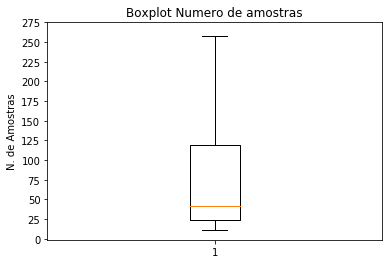

In [276]:
fig, ax = plt.subplots()
ax.boxplot(data_dist, showfliers=False)
plt.yticks(np.arange(0, 300, 25))
plt.ylabel('N. de Amostras')
plt.title('Boxplot Numero de amostras')
plt.savefig('/Users/lucianoaraujo/Desktop/boxplot_dist_sem_outliers.jpg')
plt.show()

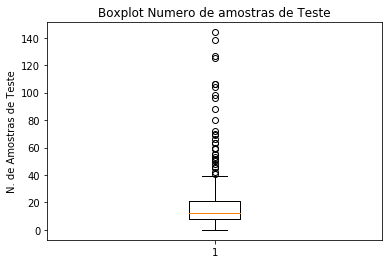

In [454]:
source = HOME_DIR+'git/test_dataset_class_distribution.csv'
test_data_dist = pd.read_csv(source).NumberOfImages
#data_dist = data_dist.n_samples_by_class
fig, ax = plt.subplots()
ax.boxplot(test_data_dist)
plt.yticks(np.arange(0, max(test_data_dist), 20))
plt.ylabel('N. de Amostras de Teste')
plt.title('Boxplot Numero de amostras de Teste')
#plt.savefig('/Users/lucianoaraujo/Desktop/boxplot_distribuicao.jpg')
plt.show()

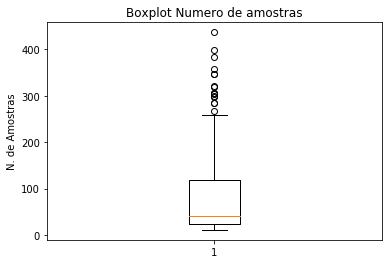

In [275]:
source = HOME_DIR+'git/training_data_distribution.csv'
data_dist = pd.read_csv(source)
data_dist = data_dist.n_samples_by_class

fig, ax = plt.subplots()
ax.boxplot(data_dist)
#plt.yticks(np.arange(0, max(data_dist), 20))
plt.ylabel('N. de Amostras')
plt.title('Boxplot Numero de amostras')
plt.savefig('/Users/lucianoaraujo/Desktop/boxplot_distribuicao.jpg')
plt.show()

In [234]:
low_labels = []
mid_labels = []
high_labels = []
for i in range(label_list):
    if data_dist[i] <= 45:
        low_labels.append(i)
    if data_dist[i] > 45 and data_dist[i] <= 115:
        mid_labels.append(i)
    if data_dist[i] > 115 and data_dist[i] <= 270:
        high_labels.append(i)

low_f1_or = []
mid_f1_or = []
high_f1_or = []

low_f1_crop = []
mid_f1_crop = []
high_f1_crop = []

for i in range(len(low_labels)):
    low_f1_or.append(f1_original_dataset[low_labels[i]])
    low_f1_crop.append(f1_trans_and_crop_dataset[low_labels[i]])
#    low_f1_crop.append(f1_crop_dataset[low_labels[i]])
    
for i in range(len(mid_labels)):
    mid_f1_or.append(f1_original_dataset[mid_labels[i]])
    mid_f1_crop.append(f1_trans_and_crop_dataset[mid_labels[i]])

for i in range(len(high_labels)):
    high_f1_or.append(f1_original_dataset[high_labels[i]])
    high_f1_crop.append(f1_trans_and_crop_dataset[high_labels[i]])

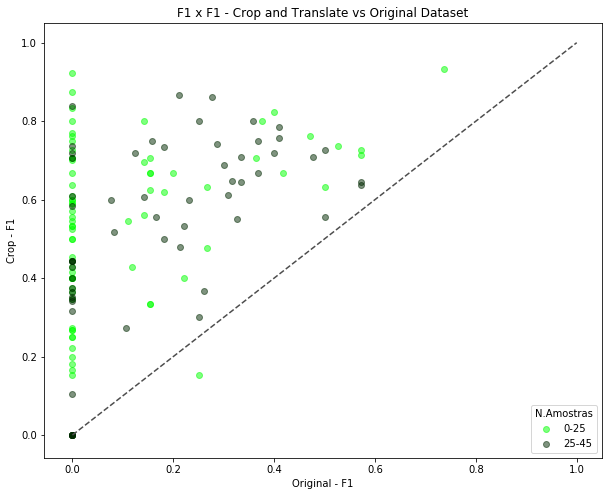

In [499]:
sub_low_labels = []
low_labels = []
mid_labels = []
high_labels = []
for i in (label_list):
    if data_dist[i] <= 25:
        sub_low_labels.append(i)
    if data_dist[i] > 25 and data_dist[i] <= 45:
        low_labels.append(i)
    if data_dist[i] > 45 and data_dist[i] <= 115:
        mid_labels.append(i)
    if data_dist[i] > 115 and data_dist[i] <= 270:
        high_labels.append(i)

sub_low_f1_or = []
low_f1_or = []
mid_f1_or = []
high_f1_or = []

sub_low_f1_crop = []
low_f1_crop = []
mid_f1_crop = []
high_f1_crop = []


for i in range(len(sub_low_labels)):
    sub_low_f1_or.append(f1_original_dataset[sub_low_labels[i]])
    sub_low_f1_crop.append(f1_trans_and_crop_dataset[sub_low_labels[i]])
    
for i in range(len(low_labels)):
    low_f1_or.append(f1_original_dataset[low_labels[i]])
    low_f1_crop.append(f1_trans_and_crop_dataset[low_labels[i]])
    
for i in range(len(mid_labels)):
    mid_f1_or.append(f1_original_dataset[mid_labels[i]])
    mid_f1_crop.append(f1_trans_and_crop_dataset[mid_labels[i]])

for i in range(len(high_labels)):
    high_f1_or.append(f1_original_dataset[high_labels[i]])
    high_f1_crop.append(f1_trans_and_crop_dataset[high_labels[i]])

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.scatter(x=sub_low_f1_or,y=sub_low_f1_crop,c=['#00ff00'],alpha=0.5,label='0-25') # verde
ax.legend()
ax.scatter(x=low_f1_or,y=low_f1_crop,c=['#012901'],alpha=0.5,label='25-45') # verde
ax.legend()
#ax.scatter(x=mid_f1_or,y=mid_f1_crop,c=['#0000ff'],alpha=0.5,label='45-115') # azul
#ax.legend()
#ax.scatter(x=high_f1_or,y=high_f1_crop,c=['#ff0000'],alpha=0.5,label='115-270') # vermelho
ax.legend(title='N.Amostras')
plt.ylabel('Crop - F1')
plt.xlabel('Original - F1')
plt.title('F1 x F1 - Crop and Translate vs Original Dataset')
plt.savefig('/Users/lucianoaraujo/Desktop/f1xf1_filtered.jpg')
plt.show()

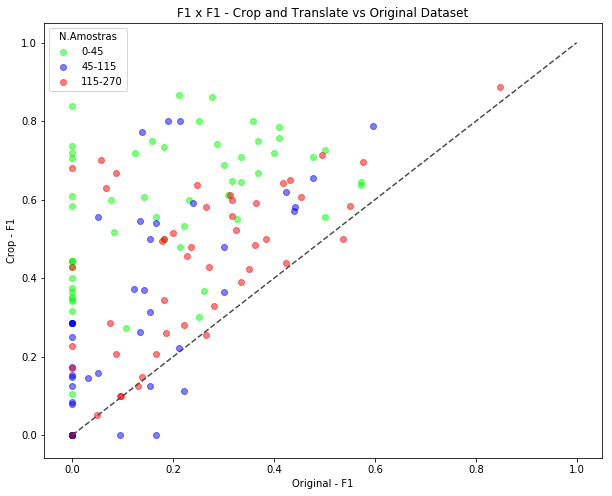

In [501]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.scatter(x=low_f1_or,y=low_f1_crop,c=['#00ff00'],alpha=0.5,label='0-45') # verde
ax.legend()
ax.scatter(x=mid_f1_or,y=mid_f1_crop,c=['#0000ff'],alpha=0.5,label='45-115') # azul
ax.legend()
ax.scatter(x=high_f1_or,y=high_f1_crop,c=['#ff0000'],alpha=0.5,label='115-270') # vermelho
ax.legend(title='N.Amostras')
plt.ylabel('Crop - F1')
plt.xlabel('Original - F1')
plt.title('F1 x F1 - Crop and Translate vs Original Dataset')
plt.savefig('/Users/lucianoaraujo/Desktop/f1xf1.jpg')
plt.show()


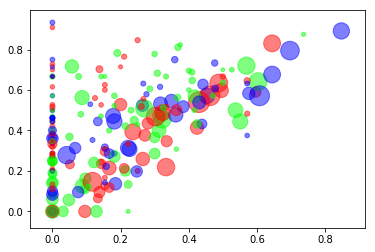

In [80]:
plt.scatter(x=f1_original_dataset,y=f1_crop_dataset,c=['#00ff00','#0000ff','#ff0000'],s=data_dist,alpha=0.5)


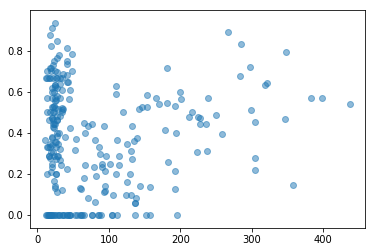

In [76]:
plt.scatter(x=data_dist,y=f1_crop_dataset,alpha=0.5)

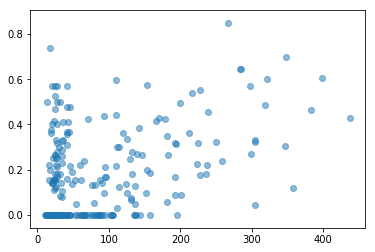

In [77]:
plt.scatter(x=data_dist,y=f1_original_dataset,alpha=0.5)

In [55]:
f1_original_dataset

In [8]:
diff_crop_original_resnet50 = []
for i in range(250):
  diff_crop_original_resnet50.append(f1_by_class_crop_dataset[i] - f1_by_class_original_dataset[i])

In [10]:
diff_crop_original_resnet50[208]

0.9333333333333333

In [37]:
source = HOME_DIR+'git/training_data_distribution.csv'
data_dist = pd.read_csv(source)
data_dist = data_dist.n_samples_by_class

In [23]:
data = [0.13196480938416416,
 0.11782032400589099,
 0.10996036790548114,
 0.14117647058823532,
 0.36065573770491804,
 0.14638752052545156,
 0.15903067020068162,
 0.11536209252391172,
 -0.006327293643945797,
 0.08720379146919433,
 0.2596585804132974,
 0.10861865407319943,
 0.15196078431372562,
 0.3636363636363636,
 0.33333333333333337,
 -0.037313432835821,
 0.2145723988885459,
 0.1858595936919707,
 0.25,
 0.0070621468926554964,
 0.16631097560975616,
 0.03777309818373242,
 0.08333333333333334,
 0.18127608825283248,
 0.0,
 -0.04851031321619556,
 -0.010449320794148342,
 -0.01428571428571429,
 0.03164071315730077,
 -0.04269293924466337,
 0.5921325051759835,
 0.10769230769230764,
 0.1574177782303228,
 0.1904761904761905,
 0.2936159214267252,
 0.04761904761904759,
 0.23928326315594228,
 0.0,
 0.16456582633053224,
 0.060606060606060615,
 0.0,
 0.0022396416573348676,
 0.03804347826086957,
 -0.006591957811469984,
 0.10182737616365933,
 0.47554347826086957,
 0.18604651162790697,
 0.0,
 0.1506930693069306,
 0.3111111111111111,
 -0.006236711552090712,
 0.06538796861377508,
 0.08127721335268506,
 -0.028846153846153855,
 0.0,
 0.0,
 0.32777777777777767,
 0.015873015873015858,
 0.09150326797385624,
 0.10488193539041002,
 0.14285714285714285,
 0.1,
 0.0,
 -0.014285714285714235,
 0.13380867498514565,
 0.028694404591104755,
 0.06559139784946233,
 0.19624819624819623,
 -0.06881720430107525,
 -0.03125,
 0.01976639712488769,
 0.09243697478991597,
 -0.10657596371882083,
 0.23611111111111108,
 0.1547826086956522,
 0.008190008190008202,
 0.0,
 0.2576489533011272,
 0.2692307692307693,
 0.09755085097550864,
 0.0,
 0.008145257084676734,
 0.0,
 0.7,
 0.4705882352941177,
 0.27272727272727276,
 0.43500000000000005,
 0.33333333333333337,
 0.06432748538011698,
 0.07373271889400923,
 0.4777777777777778,
 0.41830065359477125,
 0.3829787234042553,
 0.3966666666666666,
 0.2,
 0.5,
 0.659275053304904,
 0.3030852994555354,
 0.09956709956709958,
 0.19515306122448983,
 0.10389610389610393,
 0.5541795665634676,
 0.2956521739130435,
 0.7142857142857143,
 0.1111111111111111,
 0.3896103896103895,
 0.28571428571428575,
 0.32,
 0.13815789473684215,
 -0.19642857142857156,
 0.6153846153846153,
 0.23680241327300144,
 0.3571428571428571,
 0.38345864661654133,
 0.17368421052631589,
 0.19999999999999998,
 0.2105263157894737,
 0.4444444444444445,
 0.3910256410256409,
 0.23529411764705882,
 0.3752345215759849,
 0.5,
 0.42105263157894735,
 0.2784090909090909,
 0.12953091684434964,
 0.18279569892473124,
 0.23333333333333336,
 0.23529411764705885,
 0.5142857142857143,
 0.442389758179232,
 0.24658634538152613,
 0.4444444444444444,
 0.3399209486166008,
 0.15384615384615383,
 0.5647716682199442,
 0.6666666666666666,
 0.6666666666666665,
 -0.04999999999999999,
 0.3277310924369748,
 0.06015037593984973,
 0.0,
 0.21000000000000005,
 0.3333333333333333,
 0.0,
 0.20676691729323307,
 0.38095238095238093,
 0.9090909090909091,
 0.10084033613445359,
 0.08333333333333334,
 -0.09523809523809523,
 0.08333333333333348,
 0.4615384615384615,
 0.4461538461538461,
 0.13636363636363646,
 0.26262626262626265,
 0.012820512820512803,
 0.5897435897435896,
 0.29959514170040474,
 -0.08866995073891631,
 0.28571428571428575,
 0.36491228070175435,
 0.1363636363636362,
 0.0893682588597843,
 0.2571428571428572,
 -0.04901960784313729,
 0.39999999999999997,
 0.0,
 0.011685674113419753,
 0.31842105263157894,
 -0.01098901098901095,
 0.380952380952381,
 0.5128205128205127,
 0.4615384615384615,
 0.6666666666666666,
 0.19999999999999996,
 0.4444444444444444,
 0.3333333333333333,
 0.0,
 0.4615384615384615,
 0.27586206896551724,
 0.5238095238095236,
 0.0,
 0.47115384615384615,
 0.19999999999999996,
 0.75,
 0.26666666666666666,
 -0.05594405594405594,
 0.4615384615384615,
 0.5263157894736842,
 0.44852941176470595,
 0.3414634146341463,
 0.16666666666666652,
 0.3203463203463204,
 0.5714285714285714,
 0.28571428571428575,
 0.0,
 0.3636363636363636,
 0.5961538461538461,
 0.5,
 0.0,
 0.33333333333333337,
 0.1872391174716756,
 0.4,
 0.2888888888888889,
 0.01594896331738438,
 0.16194331983805668,
 0.1424501424501425,
 0.5714285714285714,
 0.9333333333333333,
 0.7272727272727272,
 0.17857142857142855,
 0.0,
 0.0,
 0.0,
 -0.049891816214840234,
 0.28571428571428575,
 0.2424242424242424,
 0.044037626017631726,
 0.0,
 -0.08888888888888888,
 0.0,
 0.13333333333333336,
 0.34782608695652173,
 0.0,
 0.1111111111111111,
 0.11980702224604664,
 -0.03616636528028927,
 0.5161290322580645,
 -0.12903225806451613,
 0.1190476190476191,
 0.0,
 0.18181818181818182,
 0.6666666666666666,
 0.0,
 0.25,
 0.0,
 0.0,
 0.25,
 0.0,
 0.3478260869565218,
 -0.22222222222222224,
 0.0,
 -0.11458333333333331,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]